In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("City_Zhvi_{}bedroom.csv".format(1))
data.shape

(14927, 300)

In [3]:
print(data.columns)

Index(['Unnamed: 0', 'RegionID', 'SizeRank', 'RegionName', 'RegionType',
       'StateName', 'State', 'Metro', 'CountyName', '1996-01-31',
       ...
       '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31'],
      dtype='object', length=300)


In [27]:
myrow=data[data["RegionName"] == "San Jose"]
#print(myrow.columns)
datetime_row=myrow.iloc[:,9:]

KeyError: 'RegionName'

In [54]:
print(datetime_row.shape)
print()
print(datetime_row.head())
data=pd.DataFrame()
data["Months"]=list(datetime_row.columns)
data["Values"]=list(datetime_row.iloc[0,:].values)
#data=datetime_row.T
print("shape---->",data.shape)
print(type(data))

(1, 291)

    1996-01-31  1996-02-29  1996-03-31  1996-04-30  1996-05-31  1996-06-30  \
11    127479.0    126984.0    126698.0    126305.0    125814.0    125586.0   

    1996-07-31  1996-08-31  1996-09-30  1996-10-31  ...  2019-06-30  \
11    125277.0    125572.0    125909.0    126540.0  ...    576643.0   

    2019-07-31  2019-08-31  2019-09-30  2019-10-31  2019-11-30  2019-12-31  \
11    569030.0    565739.0    565805.0    566135.0    567223.0    570537.0   

    2020-01-31  2020-02-29  2020-03-31  
11    576803.0    583254.0    589553.0  

[1 rows x 291 columns]
shape----> (291, 2)
<class 'pandas.core.frame.DataFrame'>


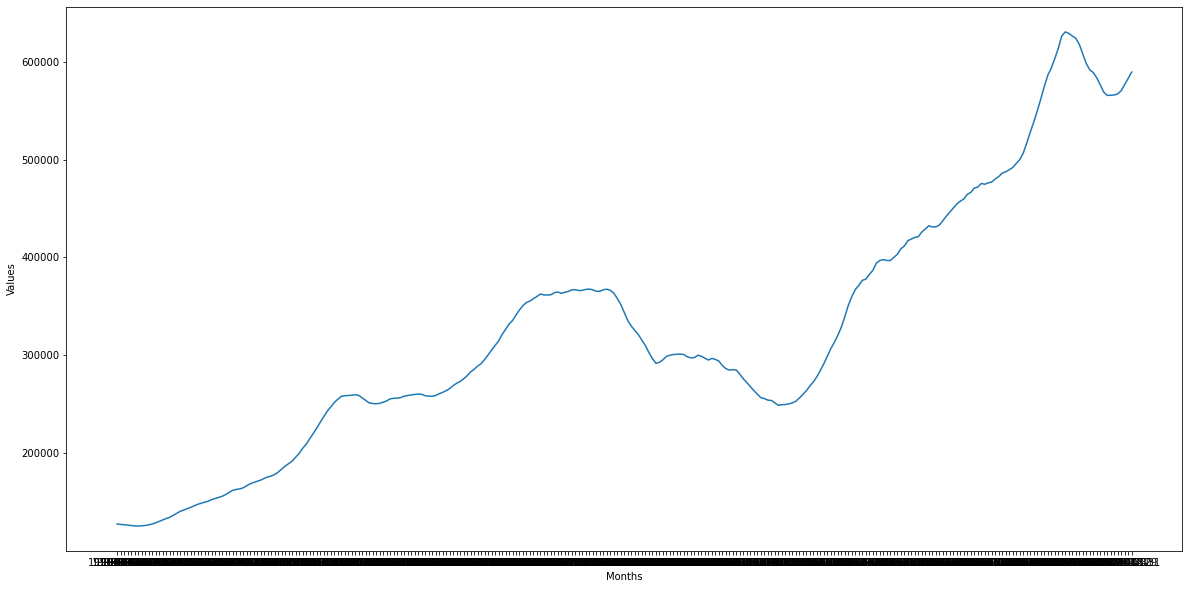

In [56]:
plt.figure(figsize=(20,10))
plt.xlabel("Months")
plt.ylabel("Values")
plt.plot(data["Months"],data["Values"])
plt.show()

In [57]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

           Values
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11  126515.000000
12  126728.333333
13  127105.583333
14  127629.500000
         Values
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11   978.296386
12  1397.102478
13  1967.267901
14  2588.069217


In [60]:
print(rolmean.columns)
print(rolstd.columns)

Index(['Values'], dtype='object')
Index(['Values'], dtype='object')


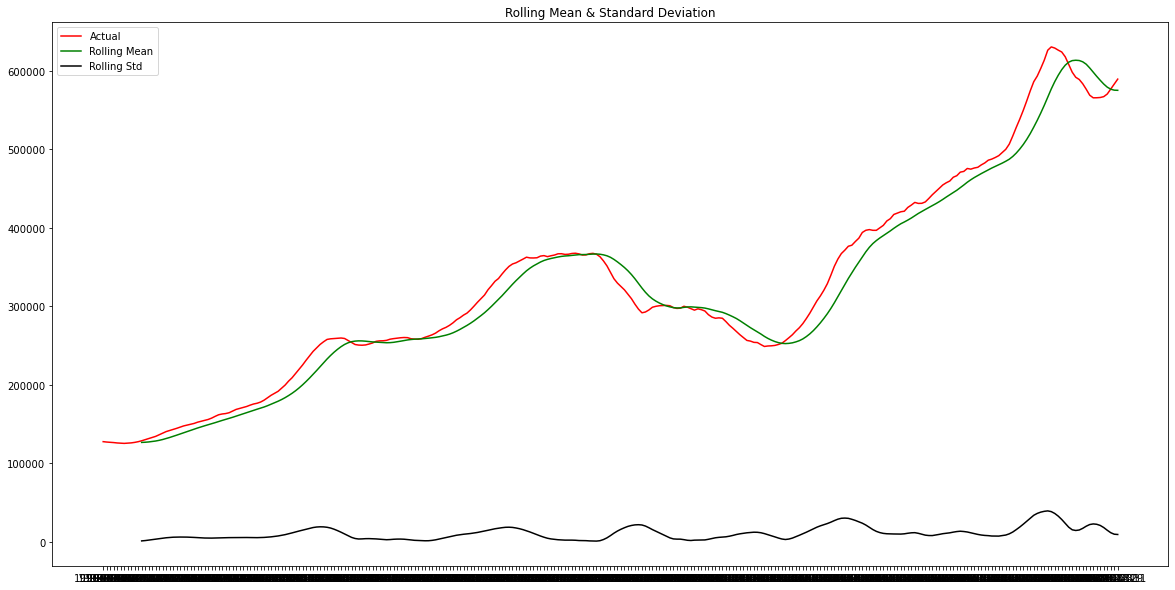

In [61]:
plt.figure(figsize=(20,10))
actual=plt.plot(data["Months"],data["Values"], color='red', label='Actual')
mean_6=plt.plot(data["Months"],rolmean["Values"], color='green', label='Rolling Mean') 
std_6=plt.plot(data["Months"],rolstd["Values"], color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [62]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Values'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -0.391502
p-value                   0.911508
Lags Used                16.000000
No. of Obs              274.000000
Critical Value (1%)      -3.454444
Critical Value (5%)      -2.872147
Critical Value (10%)     -2.572422
dtype: float64


0      11.755707
1      11.751816
2      11.749562
3      11.746455
4      11.742560
         ...    
286    13.248508
287    13.254333
288    13.265256
289    13.276378
290    13.287120
Name: Values, Length: 291, dtype: float64


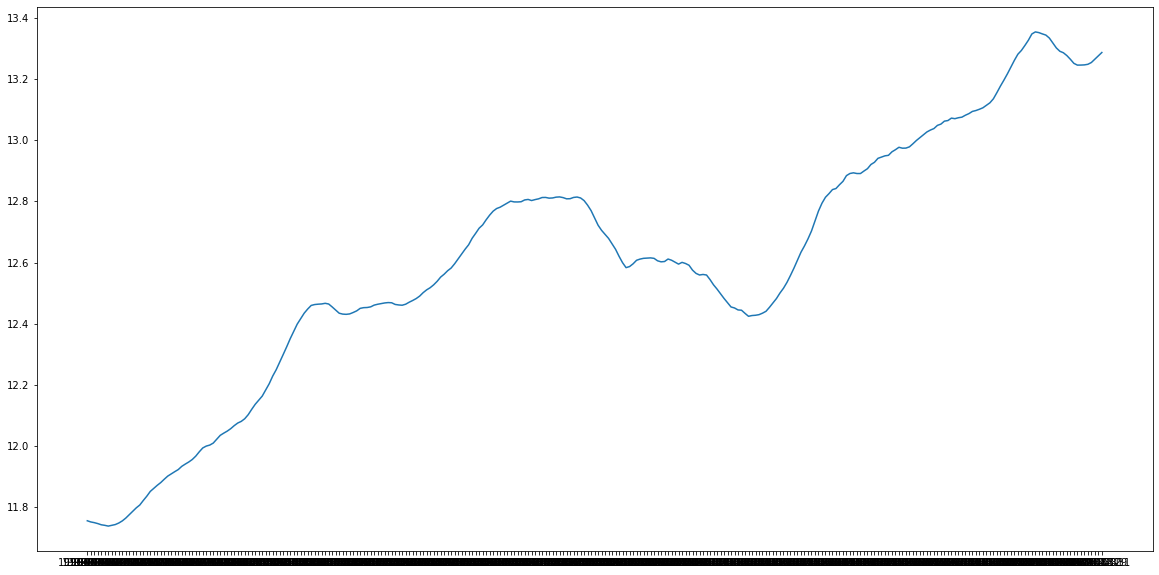

In [108]:
plt.figure(figsize=(20,10))
data_log=np.log(data["Values"])
print(data_log)
plt.plot(data["Months"],data_log)
plt.show()

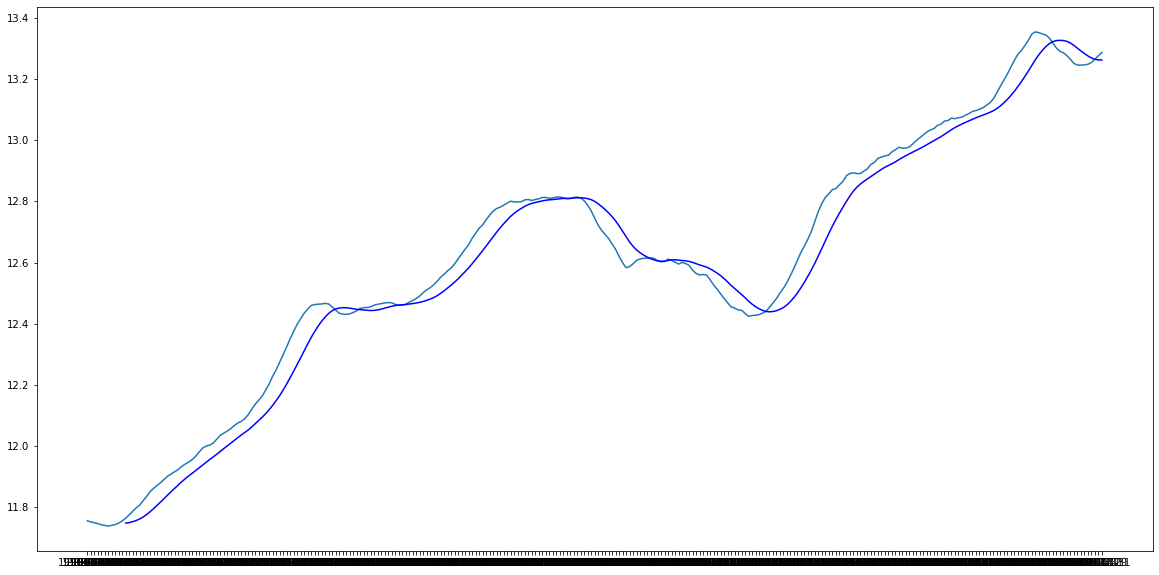

In [72]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data["Months"],data_log)
plt.plot(MAvg, color='blue')
plt.show()

In [73]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11    0.016365
Name: Values, dtype: float64

In [74]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

11    0.016365
12    0.025844
13    0.034181
14    0.041291
15    0.045422
Name: Values, dtype: float64

In [84]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(data['Values'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

<class 'pandas.core.series.Series'>


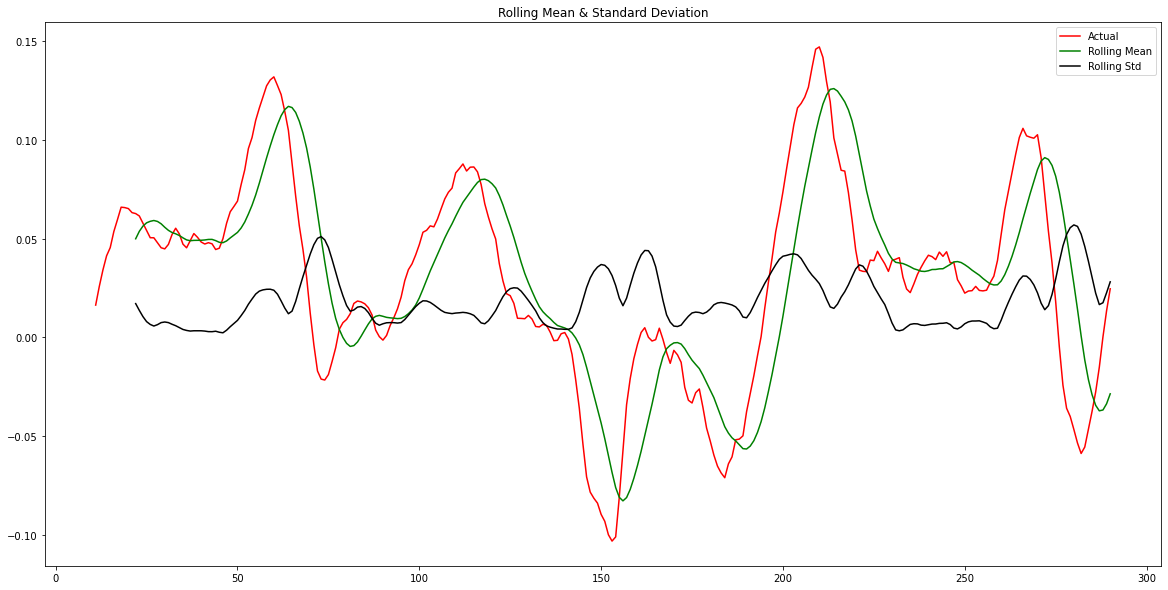

Dickey-Fuller Test: 
Test Statistic           -0.391502
p-value                   0.911508
Lags Used                16.000000
No. of Obs              274.000000
Critical Value (1%)      -3.454444
Critical Value (5%)      -2.872147
Critical Value (10%)     -2.572422
dtype: float64


In [85]:
print(type(data_log_diff))
stationarity(data_log_diff)

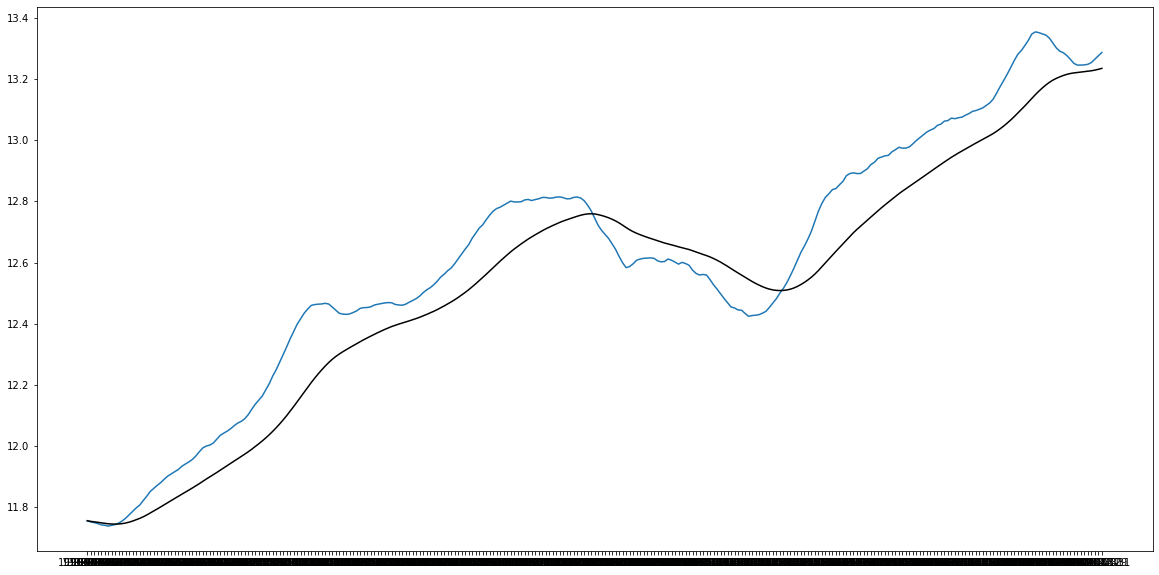

In [87]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(data["Months"],exp_data, color='black')
plt.show()

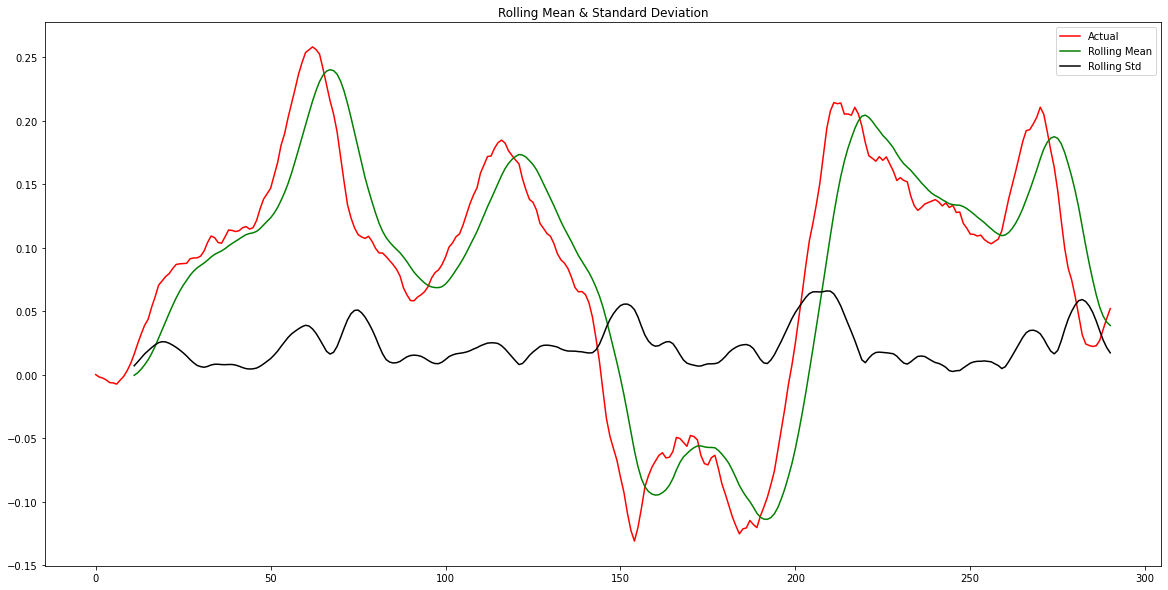

Dickey-Fuller Test: 
Test Statistic           -0.391502
p-value                   0.911508
Lags Used                16.000000
No. of Obs              274.000000
Critical Value (1%)      -3.454444
Critical Value (5%)      -2.872147
Critical Value (10%)     -2.572422
dtype: float64


In [88]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

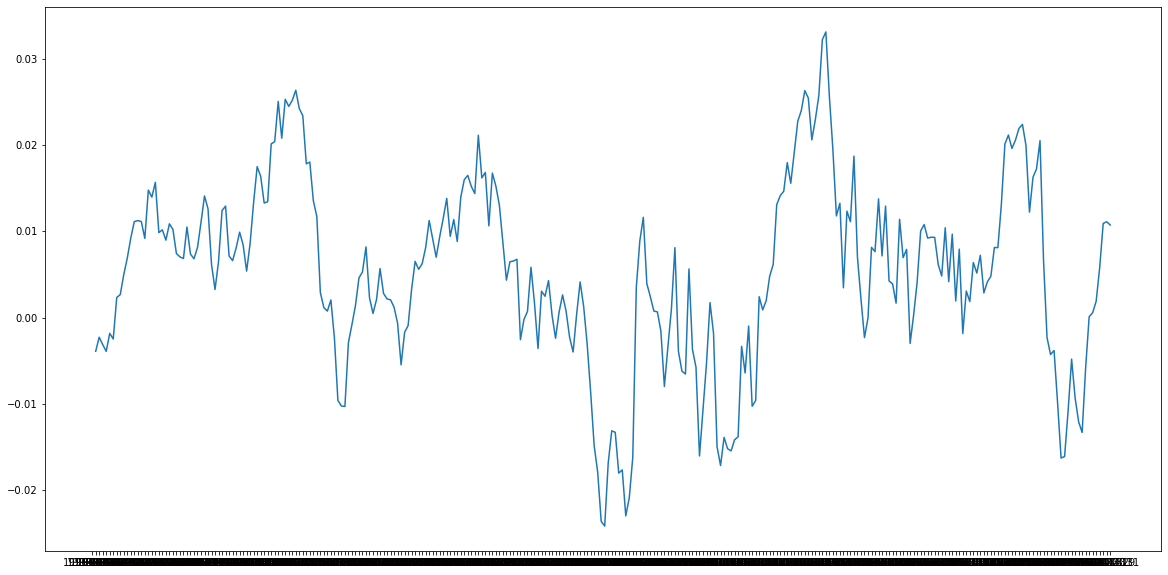

In [90]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data["Months"],data_shift)
plt.show()

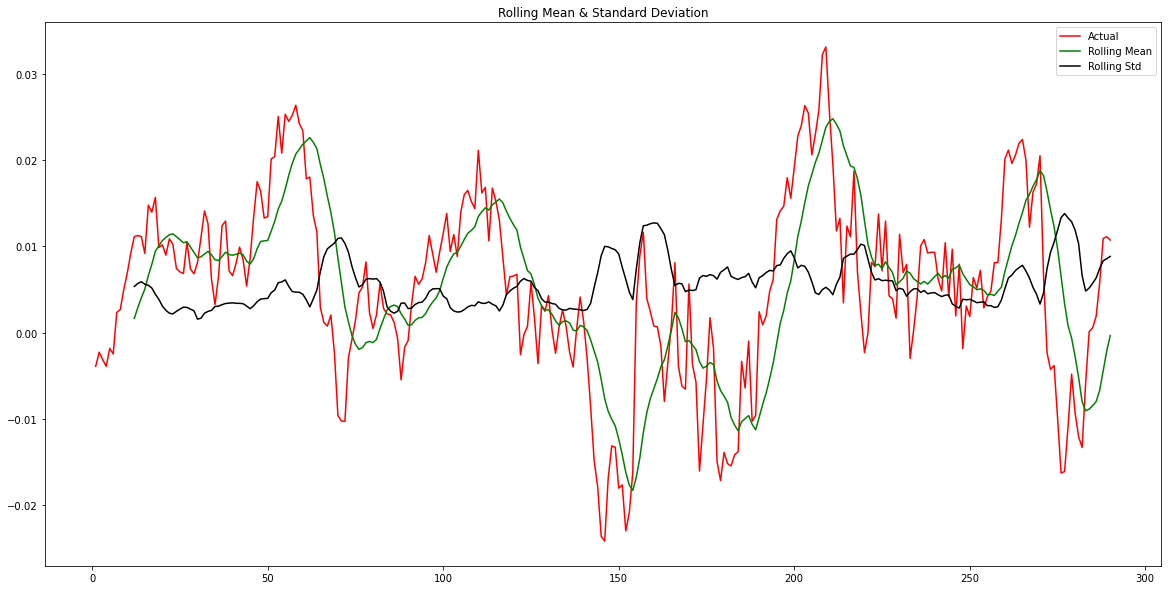

Dickey-Fuller Test: 
Test Statistic           -0.391502
p-value                   0.911508
Lags Used                16.000000
No. of Obs              274.000000
Critical Value (1%)      -3.454444
Critical Value (5%)      -2.872147
Critical Value (10%)     -2.572422
dtype: float64


In [91]:
data_shift=data_shift.dropna()
stationarity(data_shift)

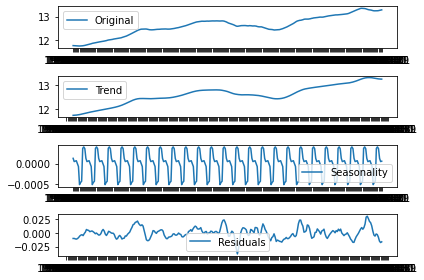

In [113]:
data_log_df=pd.DataFrame(data_log,columns=["Values","Months"])
data_log_df["Months"]=pd.to_datetime(data["Months"])
data_log_df = data_log_df.set_index('Months')

"""
df['Datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df = df.set_index('Datetime')

"""
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log_df)


trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data["Months"],data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(data["Months"],trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(data["Months"],seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(data["Months"],residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


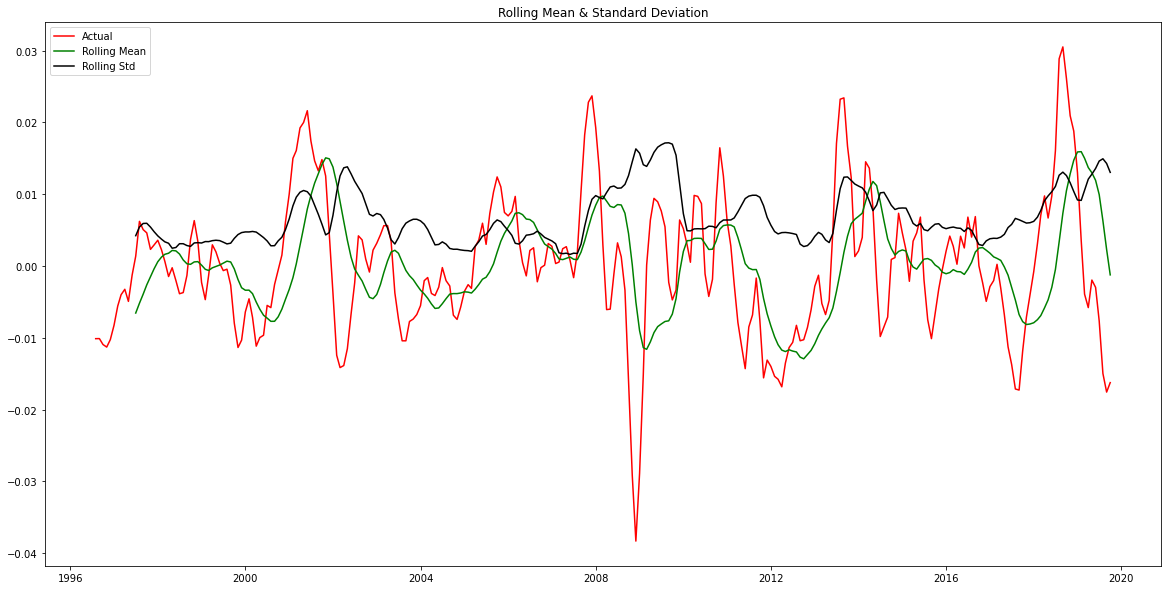

Dickey-Fuller Test: 
Test Statistic           -0.391502
p-value                   0.911508
Lags Used                16.000000
No. of Obs              274.000000
Critical Value (1%)      -3.454444
Critical Value (5%)      -2.872147
Critical Value (10%)     -2.572422
dtype: float64


In [114]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

Text(0.5, 1.0, 'Partial Autocorrelation Function')

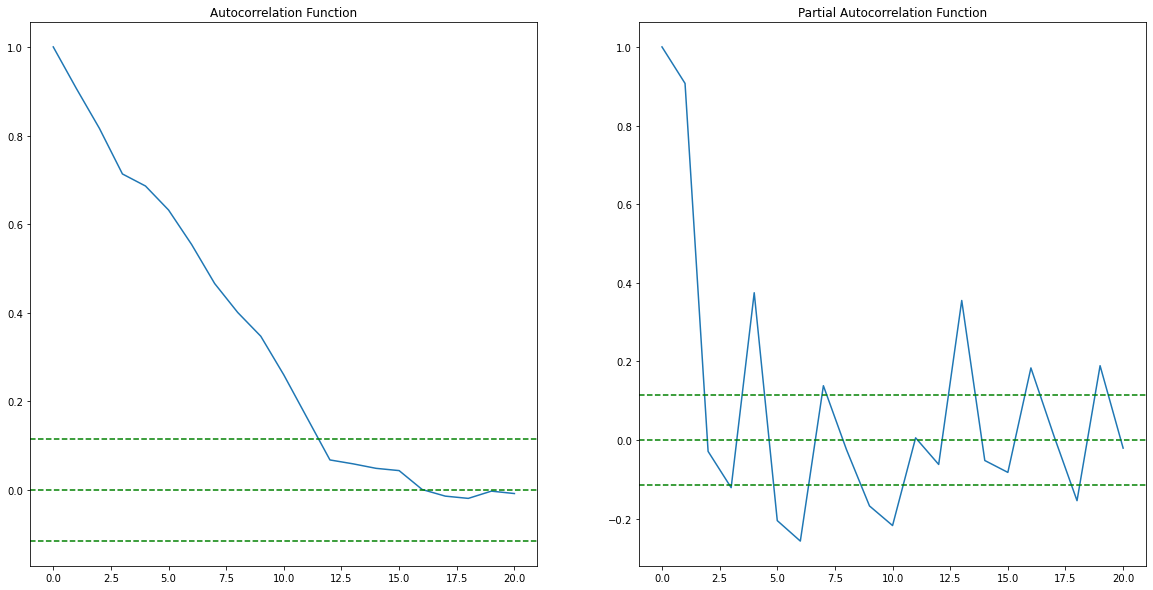

In [115]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

In [121]:
data_shift_df=pd.DataFrame(data_shift,columns=["Values"])
print(data_shift_df)


       Values
1   -0.003891
2   -0.002255
3   -0.003107
4   -0.003895
5   -0.001814
..        ...
286  0.001920
287  0.005825
288  0.010923
289  0.011122
290  0.010742

[290 rows x 1 columns]


plotting ARIMA model


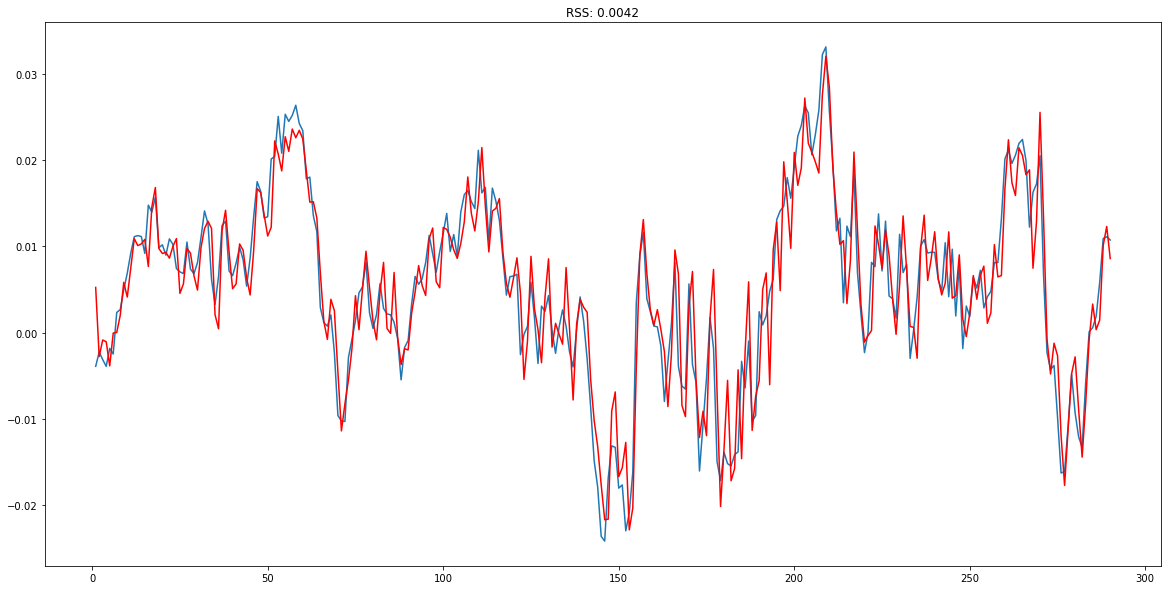

In [123]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift_df['Values'])**2))
print('plotting ARIMA model')

In [124]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

1    0.005249
2   -0.002756
3   -0.000840
4   -0.001047
5   -0.003839
dtype: float64


In [125]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

1    0.005249
2    0.002493
3    0.001653
4    0.000607
5   -0.003232
dtype: float64


In [131]:
predictions_log=pd.Series(data_log_df.iloc[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

0         NaN
1    0.005249
2    0.002493
3    0.001653
4    0.000607
dtype: float64

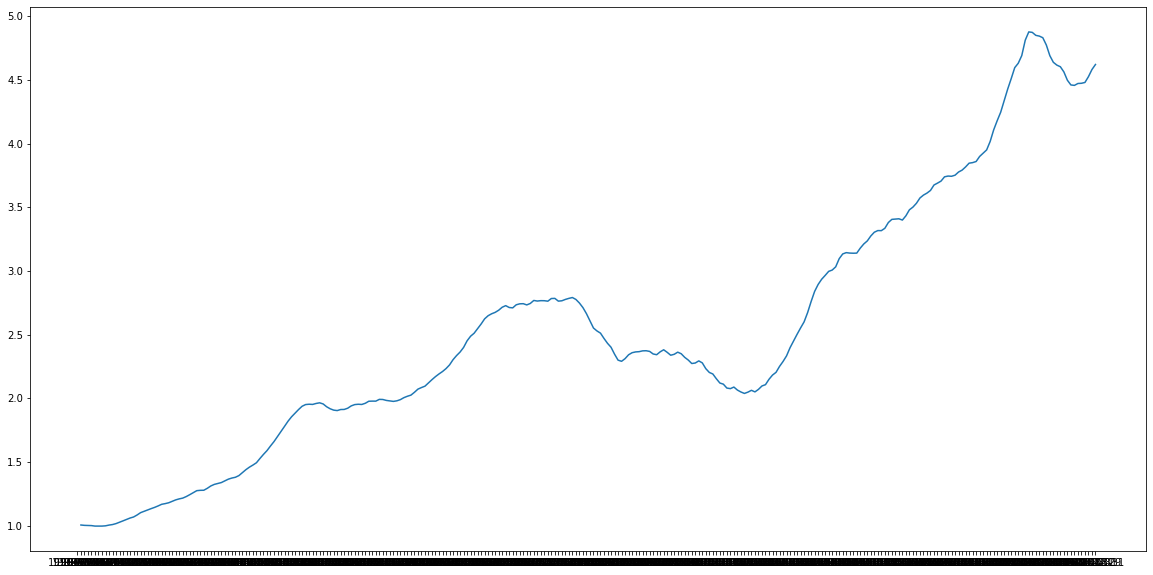

In [134]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data["Months"],predictions_ARIMA)

plt.show()

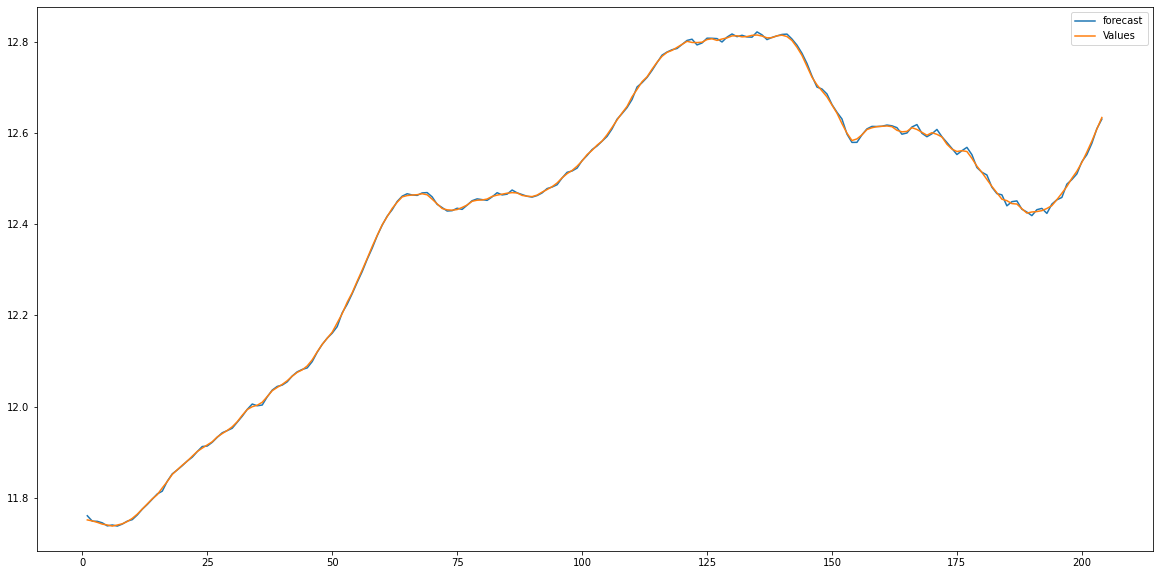

In [135]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=12)

In [136]:
x[0]

array([13.2968862 , 13.30748362, 13.31587145, 13.32384817, 13.3309722 ,
       13.33769729, 13.34401894, 13.35008474, 13.35593888, 13.3616435 ,
       13.36723234, 13.37273626])

In [137]:
np.exp(x[0])

array([595338.95793728, 601681.56325668, 606749.59363374, 611608.81922983,
       615981.491454  , 620137.98588257, 624070.70144487, 627867.69085714,
       631554.09556432, 635167.16675173, 638726.95593986, 642252.14878484])